# Notebook overview
Visualizes confusion matrices for model predictions (MLP or k-NN) as large, detailed plots with row/column sums and total counts.

- Loads precomputed confusion matrices (.npy) from score results
- Loads species label map for axis labels
- Plots confusion matrices with species names, predicted vs. true labels, and summary statistics
- Saves high-resolution confusion matrix visualizations (PDF) to the results folder

The notebook was used for both datasets just adapte the variables at "Paths - score_dir_path, df_dir_path, result_dir_path".
- selecting dataset ('origin' or 'resized') and model ('mlp' or 'knn') via variables

# Preperation

### Import

In [43]:
import pandas as pd
import numpy as np

from pathlib import Path
from typing import List

import matplotlib.pyplot as plt
from sklearn import metrics

### Paths - score_dir_path, df_dir_path, result_dir_path

In [44]:
### The paths for the original or resized data must be adjusted for visualisation (Replace 'origin' with 'resized' and vice versa).
use_dataset = 'resized'
# use_dataset = 'origin'
### The paths for the knn or mlp model must be adjusted for visualisation (Replace 'origin' with 'resized' and vice versa).
# use_model = 'knn'
use_model = 'mlp'

# score folder
SCORE_DIR_PATH = rf'/home/stud/jleick/masterArbeitProjekt/final_release/models/{use_model}/{use_dataset}/scores'
score_dir_path = Path(SCORE_DIR_PATH)
if not score_dir_path.exists():
    raise FileNotFoundError(f"File does not exist: {SCORE_DIR_PATH}")

# df folder to load species labels
DF_DIR_PATH = r'/home/stud/jleick/masterArbeitProjekt/final_release/data/datasets/created'
df_dir_path = Path(DF_DIR_PATH)
if not df_dir_path.exists():
    raise FileNotFoundError(f"File does not exist: {DF_DIR_PATH}")

# folder to save results
RESULT_DIR_PATH = rf'/home/stud/jleick/masterArbeitProjekt/final_release/models/{use_model}/{use_dataset}/scores/visualisation'
result_dir_path = Path(RESULT_DIR_PATH)
if not result_dir_path.exists():
    raise FileNotFoundError(f"Folder does not exist: {RESULT_DIR_PATH}")

# Function

### Function - plot_confusion_matrix

In [45]:
def plot_confusion_matrix( confusion_matrix: np.ndarray, labels:List[str], titel:str ):
    # create figure
    fig, ax = plt.subplots(1, 1, figsize=(67, 55))

    # calculate sum of row and columns 
    row_sums = confusion_matrix.sum(axis=1)
    col_sums = confusion_matrix.sum(axis=0)
    total = confusion_matrix.sum()

    # plot confucion matrix
    confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=labels) # , display_labels=labels_numbers_names
    confusion_matrix_display.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=90)
    colorbar = ax.get_images()[0].colorbar
    colorbar.ax.tick_params(labelsize=25)

    # adapt size of numbers in confucion matrix
    for text in ax.texts:
        text.set_fontsize(22)

    # Add labels and Titel
    # ax.set_title(titel, fontsize=60, pad=120, loc='center')
    ax.set_xlabel("Predicted label", fontsize=40)
    ax.set_ylabel("True label", fontsize=40)
    ax.tick_params(axis='x', labelsize=25) # size of labels x achse
    ax.tick_params(axis='y', labelsize=25) # size of labels y achse

    # Get axis limits
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    # Add row sums to the right
    for i, val in enumerate(row_sums):
        ax.text(xmax + 1.75, i, str(val), va='center', ha='right', fontsize=25, color='black')
    ax.text(xmax + 0.5, ymin + 0.5, "Sum of true labels per class:", va='top', ha='left', fontsize=25, color='black', rotation=90)

    # Add column sums top
    for j, val in enumerate(col_sums):
        ax.text(j, ymax - 1.75, str(val), va='top', ha='center', fontsize=25, color='black', rotation=90)
    ax.text(xmin - 0.3, ymax - 0.5, "Sum of predicted label per class:", va='bottom', ha='right', fontsize=25, color='black')

    # Add total sum in top-right corner
    ax.text(xmax + 0.5, ymax - 0.5, f"{str(total)} = n", va='bottom', ha='left', fontsize=25, color='black')

    plt.tight_layout()

    return plt

# Apply

In [46]:
label_map_id_df = pd.read_csv( df_dir_path / 'label_map_id.csv', index_col=False, usecols=['species'])
# species_list = label_map_id_df['species'].tolist() # only Spezies Names
species_list = (label_map_id_df["species"].astype(str) + " (" + label_map_id_df.index.astype(str) + ")").tolist()

### Apply - high

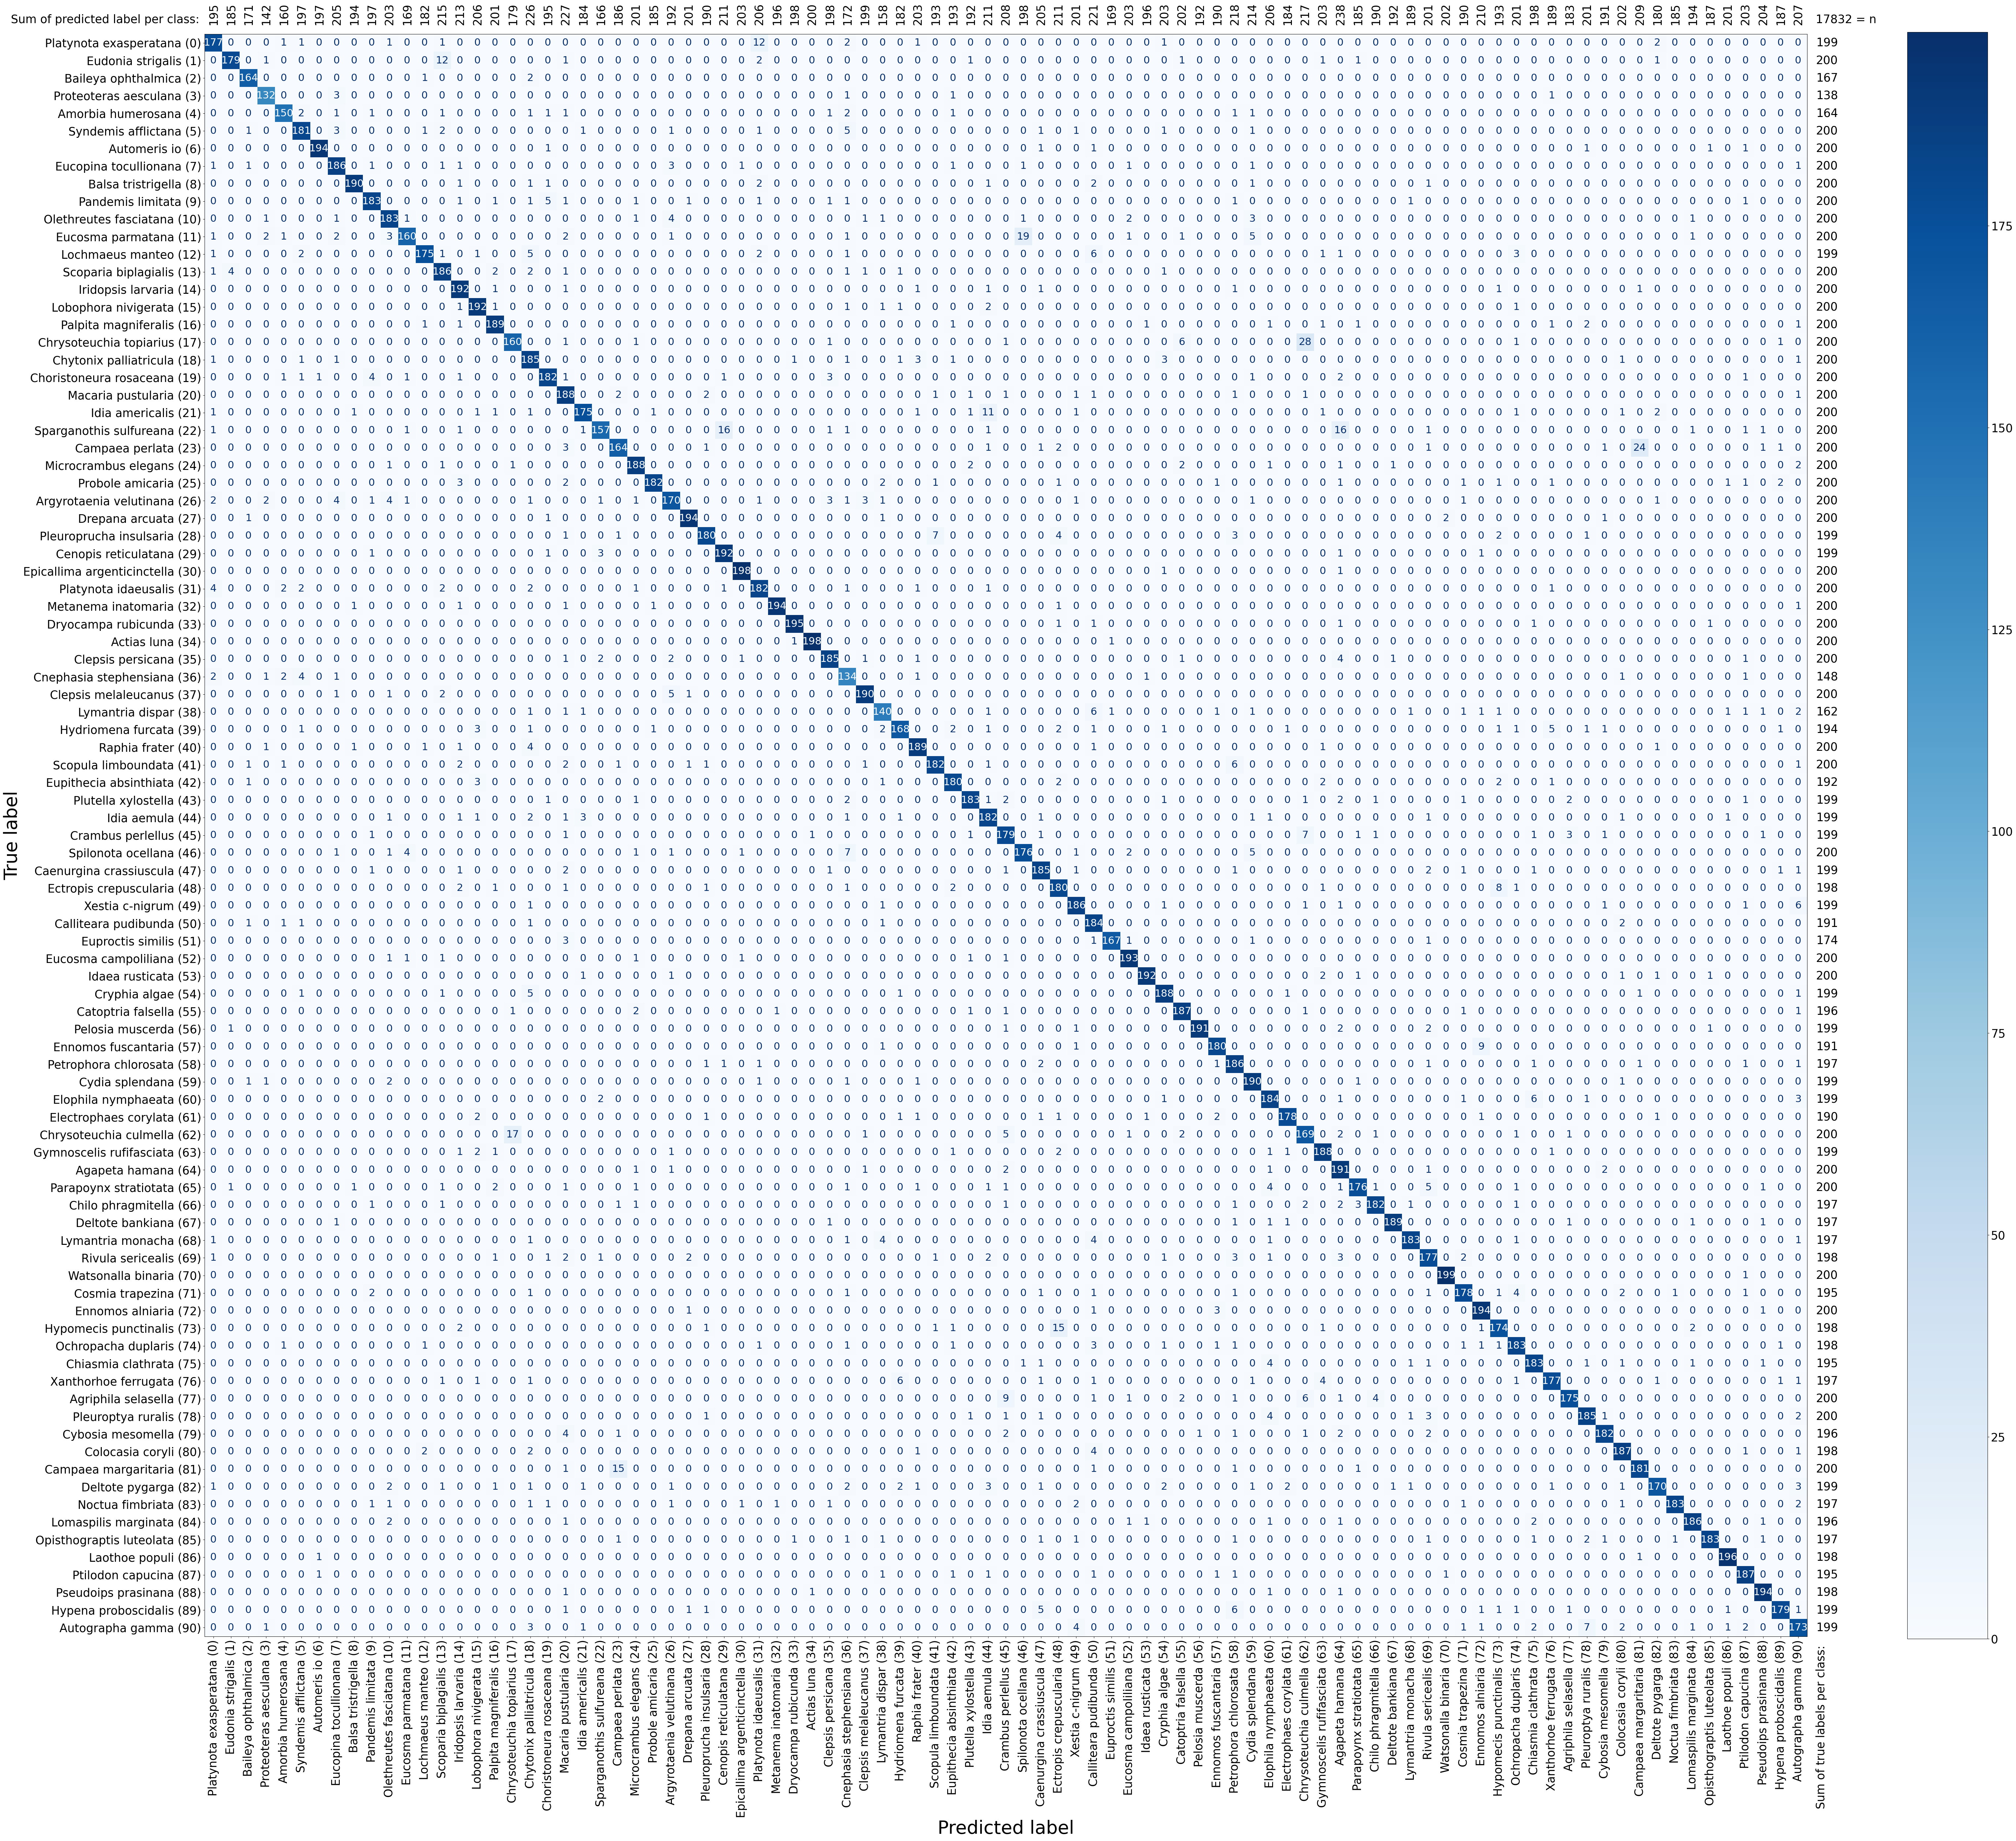

In [47]:
confusion_matrix_high = np.load( score_dir_path / 'high_id_test_confusion_matrix.npy' )

confusion_matrix_high_plot = plot_confusion_matrix(confusion_matrix_high, species_list, f'{use_model} prediction of high id testdata ({use_model} - trained on {use_dataset} images)' )
confusion_matrix_high_plot.savefig( result_dir_path / 'high_id_test_confusion_matrix.pdf', bbox_inches="tight", pad_inches=2)

### Apply - low

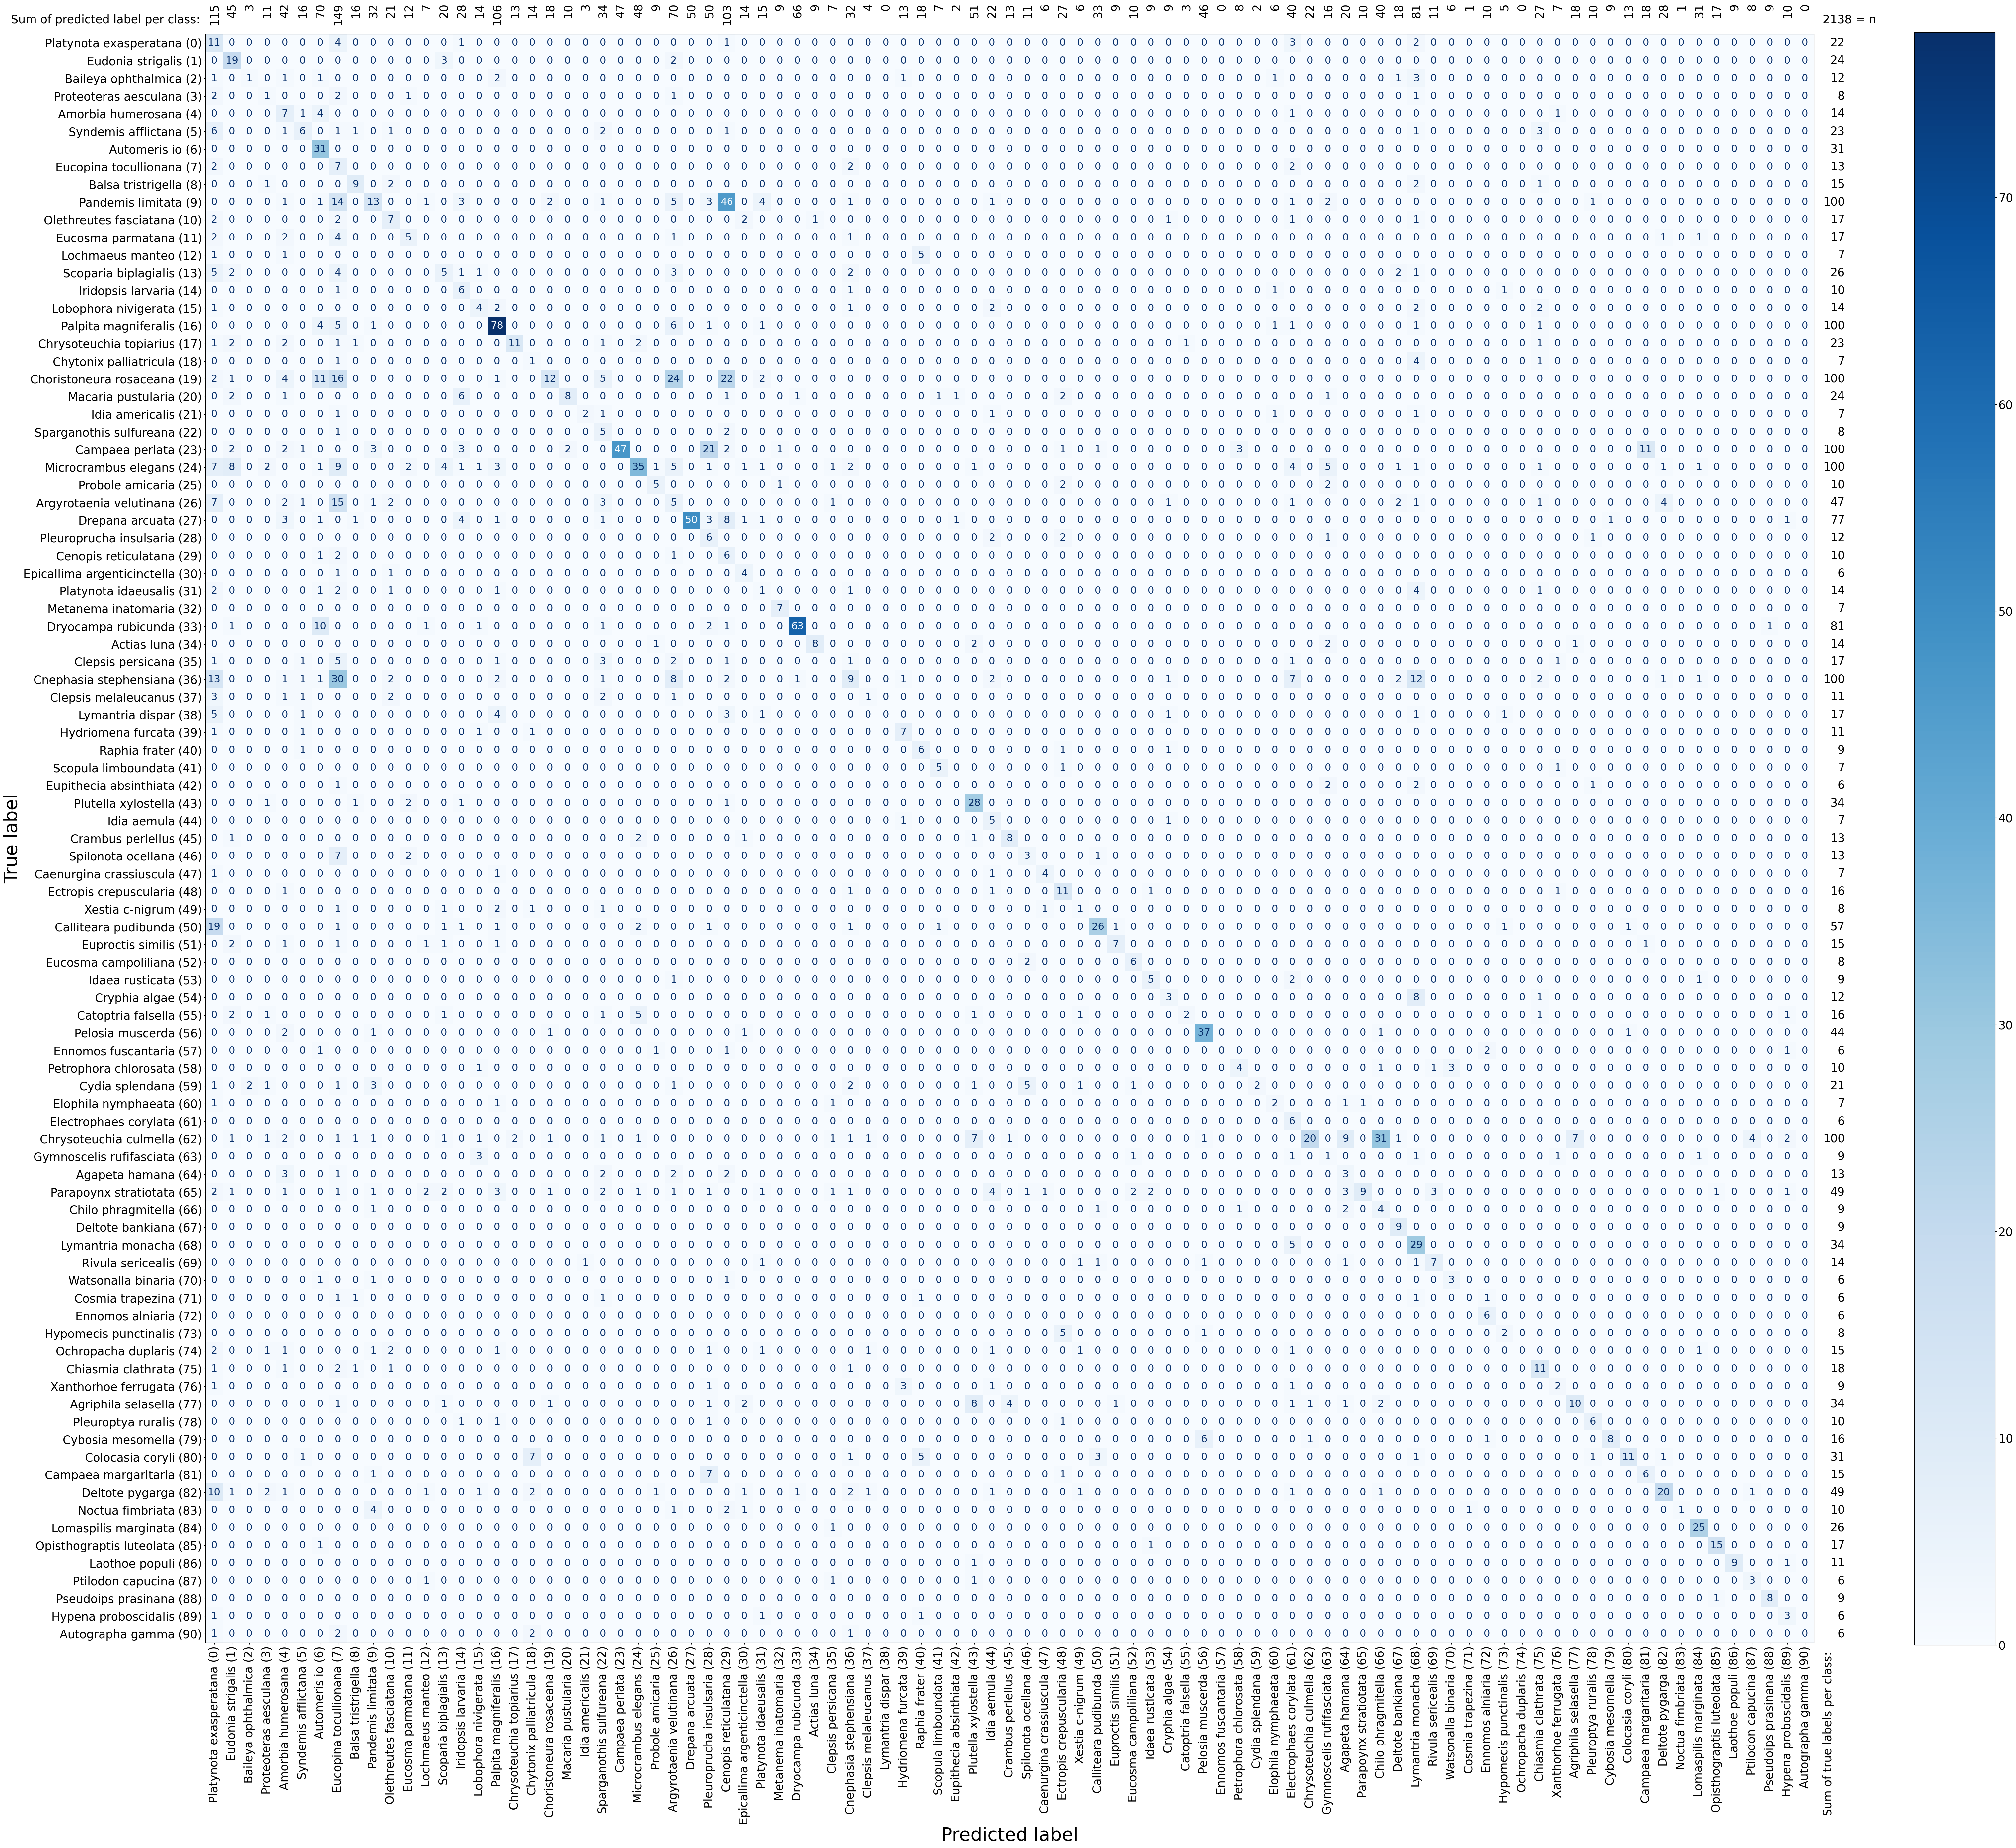

In [48]:
confusion_matrix_low = np.load( score_dir_path / 'low_id_test_confusion_matrix.npy' )

confusion_matrix_low_plot = plot_confusion_matrix(confusion_matrix_low, species_list, f'{use_model} prediction of low id testdata ({use_model} - trained on {use_dataset} images)' )
confusion_matrix_low_plot.savefig( result_dir_path / 'low_id_test_confusion_matrix.pdf', bbox_inches="tight", pad_inches=2 )